# Exploratory Data Analysis on San Francisco Salary Data

### Description

This project is an attempt at a general exploration of the San Francisco Occupation Salary data set provided to look for possible trends and abnormalities. This exploration might give an idea of different salary levels for different occupations in San Francisco, which ultimately suggests the city's development priorities.

### Assumptions and Modifications

Due to the inconsistencies in values, especially in job title descriptions, a few assumptions and modifications had to be made to the dataset prior to the analysis:

1. All rows with no job title provided had to be removed from the dataset

2. Due to the inconsistencies in job title naming, a set of generic occupations had to be listed, namely:
Mechanic, Engineer, Nurse, Police, Sheriff, Technician, Attorney, Physician, Medic, Anesthetist, Fire

- A script searched the JobTitle column to look for values containing a substring like one of the listed
occupations, and replaces its value with the above
- Some records may have been discarded if they did not contain a generic occupation substring listed above
and those records were not considered in the analysis
- Also, salaries within the same occupation vary widely, mostly by seniority, so by averaging the salaries
by the entire occupation truncates the salary data significantly
- It can still give a rough idea, though, of how much money is spent in each sector

Further Work

- A better approach to classify jobs might be to use a classification machine learning model
such as Sci-kit learn's KNeighborsClassifier model and a complete occupations dataset
- This model can also be used to classify gender by names using a male/female name dataset to
identify genders to a reasonable level of accuracy

### Methods

- Data Cleaning and Manipulation
- Exploratory Data Analysis
- SQL Querying for grouping and data aggregation

### Tools

Numpy and Pandas Library:
- Data Cleaning and Manipulation
- Exploratory Data Analysis

Matplotlib.pyplot, Seaborn:
- Data visualisation
- Exploratory Data Analysis

MySQL Connector:
- Table creation
- Querying

-------------------------------------------------------------------------

### 1. Set Up

##### Import Libraries

In [67]:
import pandas as pd
import mysql.connector
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

##### Connect to MySQL Database

In [68]:
connection = mysql.connector.connect(
    host='localhost',
    user='root',    # please use the correct user name
    password='10RelationalDatabasesAreVeryUseful!',
    database='sf_salaries',
    auth_plugin='mysql_native_password'
)
if connection.is_connected():
    db_Info = connection.get_server_info()
    # print("Connected to MySQL Server version ", db_Info, '\n')

cursor = connection.cursor()

##### Declare Functions

In [ ]:
def execute_query(query):
    '''
    Takes a single SQL query string, executes, and returns SQL output as a list of rows
    '''

    # Execute query and return all rows of output
    cursor.execute(query)
    return cursor.fetchall()


def convert_to_df(data, headers):
    '''
    Takes SQL query output's list of rows (data) and a list of column names (headers) as argument
    Returns a pandas DataFrame object

    Note: The number of columns in data and headers must be equal
    '''

    # Create and return DataFrame
    df = pd.DataFrame(data, columns=headers)
    return df


def addlabels(x, y):
    '''
    Adds y labels to plot
    '''

    for i in range(len(x)):
        plt.text(i, y[i], y[i])

##### Description of Dataset

In [69]:
df = pd.read_csv('Salaries.csv')

df.info()
df.head()

C:\Users\User\AppData\Local\Temp\ipykernel_13248\3740989038.py:1: DtypeWarning: Columns (3,4,5,6,12) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('Salaries.csv')


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 148654 entries, 0 to 148653
Data columns (total 13 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Id                148654 non-null  int64  
 1   EmployeeName      148654 non-null  object 
 2   JobTitle          148654 non-null  object 
 3   BasePay           148049 non-null  object 
 4   OvertimePay       148654 non-null  object 
 5   OtherPay          148654 non-null  object 
 6   Benefits          112495 non-null  object 
 7   TotalPay          148654 non-null  float64
 8   TotalPayBenefits  148654 non-null  float64
 9   Year              148654 non-null  int64  
 10  Notes             0 non-null       float64
 11  Agency            148654 non-null  object 
 12  Status            38119 non-null   object 
dtypes: float64(3), int64(2), object(8)
memory usage: 14.7+ MB


,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.0,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.6,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.0,56120.71,198306.9,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.6,9737.0,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN


### 2. Data Cleaning

##### Look for missing values

In [70]:
df.isna().sum()

Id                       0
EmployeeName             0
JobTitle                 0
BasePay                605
OvertimePay              0
OtherPay                 0
Benefits             36159
TotalPay                 0
TotalPayBenefits         0
Year                     0
Notes               148654
Agency                   0
Status              110535
dtype: int64

##### Drop redundant columns

In [71]:
df = df.drop(columns=['Id', 'Notes', 'Status'])

In [72]:
df.isna().sum()

EmployeeName            0
JobTitle                0
BasePay               605
OvertimePay             0
OtherPay                0
Benefits            36159
TotalPay                0
TotalPayBenefits        0
Year                    0
Agency                  0
dtype: int64

##### Fill missing values with zeroes

In [73]:
df = df.fillna(0)

In [74]:
df.isna().sum()

EmployeeName        0
JobTitle            0
BasePay             0
OvertimePay         0
OtherPay            0
Benefits            0
TotalPay            0
TotalPayBenefits    0
Year                0
Agency              0
dtype: int64

##### Check for values that are not provided

In [75]:
df[df.eq("Not Provided").any(1)]

C:\Users\User\AppData\Local\Temp\ipykernel_13248\720515528.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.any and Series.any will be keyword-only.
  df[df.eq("Not Provided").any(1)]


,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Agency
13797,Not Provided,PUBLIC SAFETY COMMUNICATIONS DISPATCHER,57963.39,19683.91,4373.86,0,82021.16,82021.16,2011,San Francisco
44151,Not Provided,Public SafetyComm Disp,82196.52,25934.2,3752.49,38024.3,111883.21,149907.51,2012,San Francisco
148646,Not provided,Not provided,Not Provided,Not Provided,Not Provided,Not Provided,0.00,0.00,2014,San Francisco
148650,Not provided,Not provided,Not Provided,Not Provided,Not Provided,Not Provided,0.00,0.00,2014,San Francisco
148651,Not provided,Not provided,Not Provided,Not Provided,Not Provided,Not Provided,0.00,0.00,2014,San Francisco
148652,Not provided,Not provided,Not Provided,Not Provided,Not Provided,Not Provided,0.00,0.00,2014,San Francisco


##### Remove rows where job titles are not provided

In [76]:
df = df[df["JobTitle"].str.contains("Not Provided|Not provided") == False]

In [77]:
df[df.eq("Not Provided").any(1)]

C:\Users\User\AppData\Local\Temp\ipykernel_13248\720515528.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.any and Series.any will be keyword-only.
  df[df.eq("Not Provided").any(1)]


,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Agency
13797,Not Provided,PUBLIC SAFETY COMMUNICATIONS DISPATCHER,57963.39,19683.91,4373.86,0,82021.16,82021.16,2011,San Francisco
44151,Not Provided,Public SafetyComm Disp,82196.52,25934.2,3752.49,38024.3,111883.21,149907.51,2012,San Francisco


##### Create clean copy of cleaned dataset

In [79]:
df_clean = df.copy()

##### Create a list of generic occupations that is able to describe the dataset to a reasonable degree

In [81]:
occupationList = ['Mechanic', 'Engineer', 'Nurse', 
                    'Police', 'Sheriff', 'Technician', 
                    'Attorney', 'Physician', 'Medic',
                    'Anesthetist', 'Fire']

##### Testing a dataframe mask to only select rows of a specific occupation

In [82]:
mask = df_clean['JobTitle'].str.contains('Nurse', case=False)

df_clean[mask].sample(3)

,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Agency
139247,Melissa E Chalot,Nurse Practitioner,40875.65,0.00,1555.50,424.34,42431.15,42855.49,2014,San Francisco
52071,Kenneth Phan,Registered Nurse,70693.2,384.4,8813.05,30069.87,79890.65,109960.52,2012,San Francisco
144819,Cecille Loren L Aguja,Special Nurse,6034.39,248.25,182.34,1436.71,6464.98,7901.69,2014,San Francisco


In [83]:
df_clean.loc[mask, 'JobTitle'] = 'Nurse'

df_clean[mask].sample(3)

,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Agency
44722,Kimberly McNease,Nurse,98506.3,0.0,4054.09,44005.34,102560.39,146565.73,2012,San Francisco
78103,Dave N Sickles,Nurse,132288.01,0.0,250.0,42591.61,132538.01,175129.62,2013,San Francisco
79855,Wanxia H Chen,Nurse,116017.41,5596.3,4737.92,35023.94,126351.63,161375.57,2013,San Francisco


##### Look for job titles that contain a substring of one of the generic occupations replace them with the generic occupation

In [84]:
fixed_jobs_df = pd.DataFrame()

for occupation in occupationList:

    mask = df_clean['JobTitle'].str.contains(occupation, case=False)
    df_clean.loc[mask, 'JobTitle'] = occupation

    df_job = df_clean[df_clean['JobTitle'].str.contains(occupation)]

    fixed_jobs_df = pd.concat([df_job, fixed_jobs_df], ignore_index=True, sort=False)


In [85]:
fixed_jobs_df

,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Agency
0,PATRICK GARDNER,Fire,134401.6,9737.0,182234.59,0,326373.19,326373.19,2011,San Francisco
1,ALSON LEE,Fire,92492.01,89062.9,134426.14,0,315981.05,315981.05,2011,San Francisco
2,MICHAEL MORRIS,Fire,176932.64,86362.68,40132.23,0,303427.55,303427.55,2011,San Francisco
3,JOANNE HAYES-WHITE,Fire,285262.0,0.0,17115.73,0,302377.73,302377.73,2011,San Francisco
4,ARTHUR KENNEY,Fire,194999.39,71344.88,33149.9,0,299494.17,299494.17,2011,San Francisco
...,...,...,...,...,...,...,...,...,...,...
43633,Ray Manamea,Mechanic,0.00,0.00,4573.51,4659.36,4573.51,9232.87,2014,San Francisco
43634,James Carne,Mechanic,3178.00,0.00,3826.32,1210.75,7004.32,8215.07,2014,San Francisco
43635,Kyin S Yi,Mechanic,0.00,0.00,2441.46,4793.94,2441.46,7235.40,2014,San Francisco
43636,Jimmy Ng,Mechanic,5039.40,0.00,0.00,1980.85,5039.40,7020.25,2014,San Francisco


### 3. Exploratory Data Analysis

##### Occupation distribution in Sanfrancisco

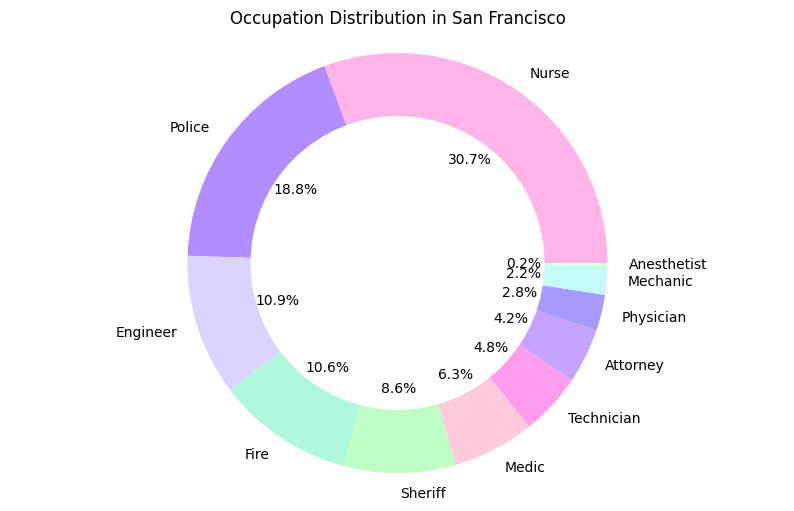

In [86]:
labels = fixed_jobs_df["JobTitle"].value_counts().index
fracs = fixed_jobs_df["JobTitle"].value_counts()
colors = ['#FFB5E8','#B28DFF','#DCD3FF','#AFF8DB', '#BFFCC6', '#FFC9DE', '#FF9CEE', '#C5A3FF', '#A79AFF', '#C4FAF8', '#DBFFD6']

fig1, ax1 = plt.subplots()
ax1.pie(fracs, labels=labels, autopct='%1.1f%%', colors=colors)
centre_circle = plt.Circle((0,0),0.70,fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax1.set_title("Occupation Distribution in San Francisco")
plt.show()

##### Observations

- High employment in government sectors such as healthcare, law enforcement, and the fire department
- Productivity sectors comes after with employments of Engineers, Mechanics, and Technicians

In [88]:
cols = ['EmployeeName', 'JobTitle', 'BasePay', 'OvertimePay', 'OtherPay', 'Benefits', 'TotalPay', 'TotalPayBenefits', 'Year', 'Agency']

##### Create new table in MySQL with clean dataset for querying

In [89]:
execute_query('DROP TABLE IF EXISTS fixed_jobs_table')

[]

In [90]:
execute_query('CREATE TABLE fixed_jobs_table (EmployeeName text, JobTitle text, BasePay int, OvertimePay int, OtherPay int, Benefits int, TotalPay int, TotalPayBenefits int, Year int, Agency text)')

[]

##### Insert clean data frame into new table in MySQL

In [91]:
# creating column list for insertion
cols = "`,`".join(cols)

# Insert DataFrame recrds one by one.
for i,row in fixed_jobs_df.iterrows():
    sql = "INSERT INTO `fixed_jobs_table` (`" +cols + "`) VALUES (" + "%s,"*(len(row)-1) + "%s)"
    cursor.execute(sql, tuple(row))

    # the connection is not autocommitted by default, so we must commit to save our changes
    connection.commit()

##### Query for average base salary across occupations

In [92]:
average_base = execute_query('SELECT JobTitle, ROUND(AVG(BasePay), 0) as average_base FROM fixed_jobs_table GROUP BY JobTitle ORDER BY average_base DESC;')

average_base_df = convert_to_df(average_base, ['Job Title', 'Average Base Salary'])

average_base_df

,Job Title,Average Base Salary
0,Anesthetist,134985
1,Attorney,133387
2,Fire,111676
3,Police,99778
4,Physician,95974
5,Engineer,92712
6,Sheriff,83436
7,Medic,76112
8,Mechanic,71889
9,Nurse,66547


In [93]:
width = 0.2

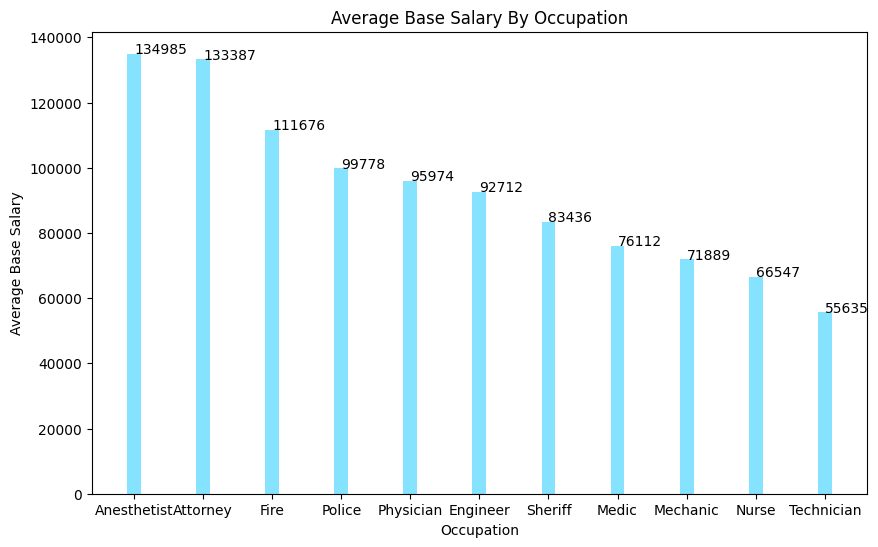

In [94]:
# Create bars
height = average_base_df['Average Base Salary']
bars = average_base_df['Job Title']
y_pos = np.arange(len(bars))
plt.bar(y_pos, height, color='#85E3FF', width=width)

# Create title
plt.title("Average Base Salary By Occupation")

# Create names on the x-axis
plt.xticks(y_pos, bars)

# Add labels
addlabels(y_pos, height)

# Add axis labels
plt.xlabel("Occupation")
plt.ylabel("Average Base Salary")

# Present plot
plt.rcParams["figure.figsize"] = (10,6)
plt.show()

##### Observations:

- The occupations drawing the highest base salaries appear to be Anesthetists and Attorneys

##### Query for average additional salary across occupations

- Consists of overtime pay, others, and benefits

In [95]:
average_additional = execute_query('SELECT JobTitle, ROUND(AVG(OvertimePay + OtherPay + Benefits), 0) as average_additional FROM fixed_jobs_table GROUP BY JobTitle ORDER BY average_additional DESC;')

average_additional_df = convert_to_df(average_additional, ['Job Title', 'Average Additional Salary'])

average_additional_df

,Job Title,Average Additional Salary
0,Fire,75106
1,Sheriff,44375
2,Police,42953
3,Mechanic,42240
4,Anesthetist,40519
5,Medic,36400
6,Attorney,31297
7,Engineer,29180
8,Physician,27046
9,Nurse,23172


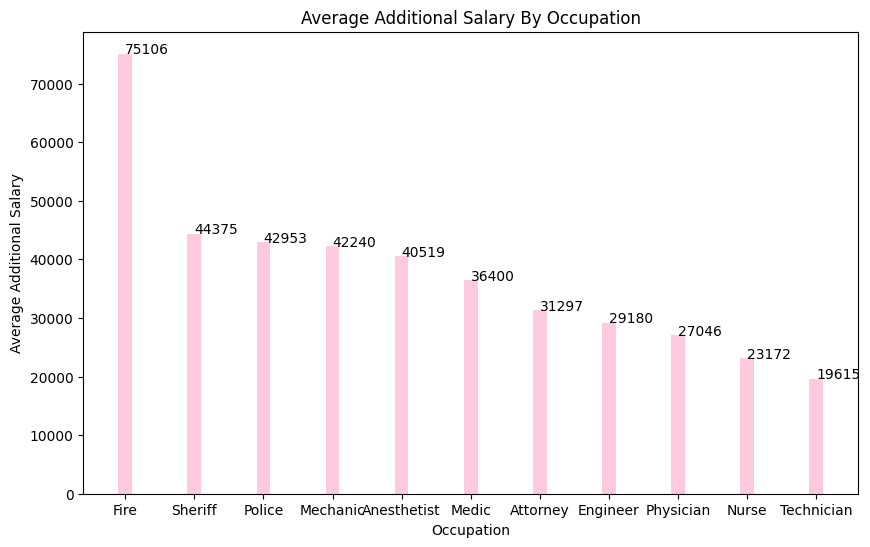

In [96]:
# Create bars
height = average_additional_df['Average Additional Salary']
bars = average_additional_df['Job Title']
y_pos = np.arange(len(bars))
plt.bar(y_pos, height, color='#FFC9DE', width=width)

# Create title
plt.title("Average Additional Salary By Occupation")

# Create names on the x-axis
plt.xticks(y_pos, bars)

# Add labels
addlabels(y_pos, height)

# Add axis labels
plt.xlabel("Occupation")
plt.ylabel("Average Additional Salary")

# Present plot
plt.rcParams["figure.figsize"] = (10,6)
plt.show()

##### Observations:

- The top 3 additional pay earners appear to be government sectory employees from law enforcement and the fire department

##### Query for just the additional benefits received across occupations

In [97]:
average_benefits = execute_query('SELECT JobTitle, ROUND(AVG(Benefits), 0) as average_benefits FROM fixed_jobs_table GROUP BY JobTitle ORDER BY average_benefits DESC;')

average_benefits_df = convert_to_df(average_benefits, ['Job Title', 'Average Benefits'])

average_benefits_df

,Job Title,Average Benefits
0,Anesthetist,30518
1,Fire,29727
2,Attorney,28768
3,Sheriff,24108
4,Engineer,22538
5,Police,21722
6,Physician,21101
7,Medic,21057
8,Mechanic,17423
9,Nurse,15431


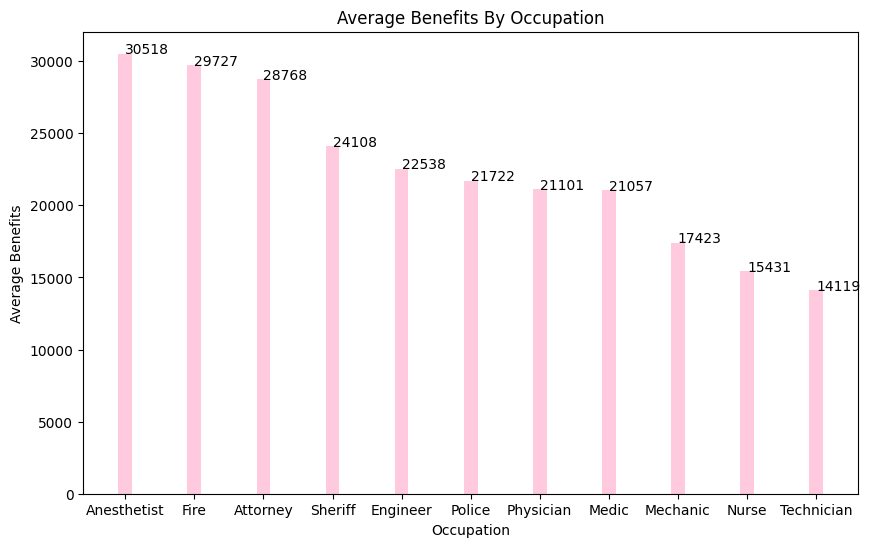

In [98]:
# Create bars
height = average_benefits_df['Average Benefits']
bars = average_benefits_df['Job Title']
y_pos = np.arange(len(bars))
plt.bar(y_pos, height, color='#FFC9DE', width=width)

# Create title
plt.title("Average Benefits By Occupation")

# Create names on the x-axis
plt.xticks(y_pos, bars)

# Add labels
addlabels(y_pos, height)

# Add axis labels
plt.xlabel("Occupation")
plt.ylabel("Average Benefits")

# Present plot
plt.rcParams["figure.figsize"] = (10,6)
plt.show()

##### Observations:

- Anesthetists appear to have receieved the highest benefits
- They, however, were not the highest earners for overall additional pay
- This suggests that they received much lower overtime pay and other pay,
especially compared to occupations in the fire department

##### Query for average overall pay across occupations

In [99]:
average_totalpay = execute_query('SELECT JobTitle, ROUND(AVG(TotalPay), 0) as average_totalpay FROM fixed_jobs_table GROUP BY JobTitle ORDER BY average_totalpay DESC;')

average_totalpay_df = convert_to_df(average_totalpay, ['Job Title', 'Average Total Salary'])

average_totalpay_df

,Job Title,Average Total Salary
0,Fire,157055
1,Anesthetist,144986
2,Attorney,135917
3,Police,121009
4,Sheriff,103703
5,Physician,101919
6,Engineer,99354
7,Mechanic,96706
8,Medic,91455
9,Nurse,74288


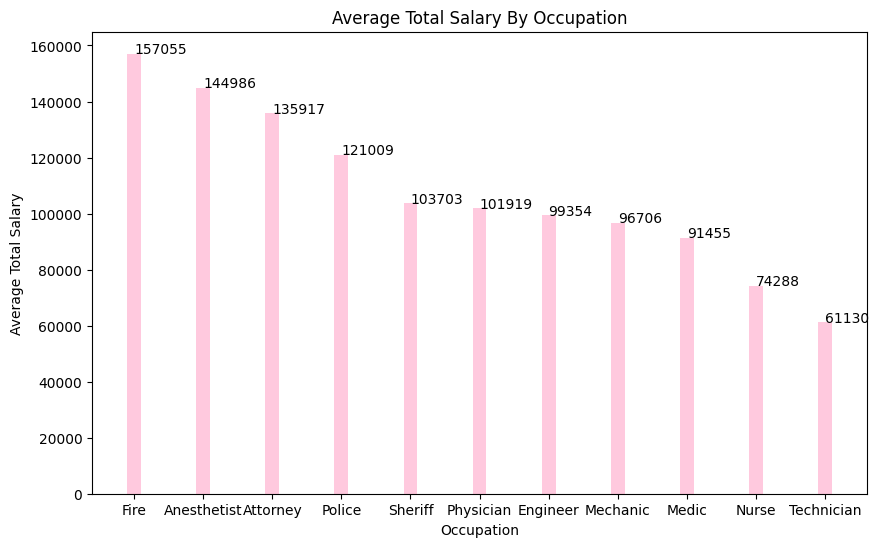

In [100]:
# Create bars
height = average_totalpay_df['Average Total Salary']
bars = average_totalpay_df['Job Title']
y_pos = np.arange(len(bars))
plt.bar(y_pos, height, color='#FFC9DE', width=width)

# Create title
plt.title("Average Total Salary By Occupation")

# Create names on the x-axis
plt.xticks(y_pos, bars)

# Add labels
addlabels(y_pos, height)

# Add axis labels
plt.xlabel("Occupation")
plt.ylabel("Average Total Salary")

# Present plot
plt.rcParams["figure.figsize"] = (10,6)
plt.show()

##### Observations

- Although with lower base salary, the fire department sees
the highest average overall salary, even higher than anesthetists
- This is due to the high overtime pay and other pay in this occupation

##### Query for the ratio of additional salary to total salary

In [101]:
average_percent_additional = execute_query('SELECT JobTitle, ROUND(AVG((OtherPay + OvertimePay + Benefits)/TotalPay * 100), 2) as average_additional_pay FROM fixed_jobs_table GROUP BY JobTitle ORDER BY average_additional_pay DESC;')

average_percent_additional_df = convert_to_df(average_percent_additional, ['Job Title', 'Percent of Additional Salary to Total Salary'])

average_percent_additional_df

,Job Title,Percent of Additional Salary to Total Salary
0,Sheriff,59.19
1,Fire,47.19
2,Mechanic,44.01
3,Technician,39.52
4,Police,37.25
5,Medic,36.66
6,Nurse,29.69
7,Engineer,29.29
8,Physician,25.26
9,Anesthetist,23.82


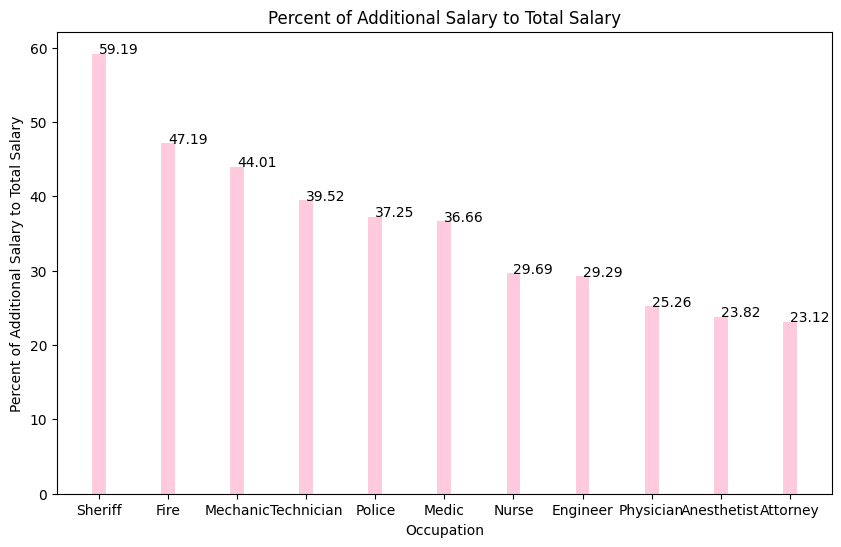

In [102]:
# Create bars
height = average_percent_additional_df['Percent of Additional Salary to Total Salary']
bars = average_percent_additional_df['Job Title']
y_pos = np.arange(len(bars))
plt.bar(y_pos, height, color='#FFC9DE', width=width)

# Create title
plt.title("Percent of Additional Salary to Total Salary")

# Create names on the x-axis
plt.xticks(y_pos, bars)

# Add labels
addlabels(y_pos, height)

# Add axis labels
plt.xlabel("Occupation")
plt.ylabel("Percent of Additional Salary to Total Salary")

# Present plot
plt.rcParams["figure.figsize"] = (10,6)
plt.show()

##### Observations

- As expected, anesthetists' and attorneys' total salaries consists mostly of base salary
and less of additional pay
- As for Sheriffs and employees in the fire department, additional pay accounts for about half
of their total salaries

##### Query for standard deviations

In [103]:
base_stdev = execute_query('SELECT JobTitle, ROUND(STDDEV(BasePay), 2) as base_stdev FROM fixed_jobs_table GROUP BY JobTitle ORDER BY JobTitle;')
additional_stdev = execute_query('SELECT JobTitle, ROUND(STDDEV(OtherPay + OvertimePay), 2) as additional_stdev FROM fixed_jobs_table GROUP BY JobTitle ORDER BY JobTitle;')
job_labels = execute_query('SELECT JobTitle FROM fixed_jobs_table GROUP BY JobTitle ORDER BY JobTitle;')

base_stdev_df = convert_to_df(base_stdev, ['Job Title', 'Standard Deviation of Base Salary'])
additional_stdev_df = convert_to_df(additional_stdev, ['Job Title', 'Standard Deviation of Additional Salary'])
job_labels_df = convert_to_df(job_labels, ['Job Title'])

In [104]:
base_stdev_df

,Job Title,Standard Deviation of Base Salary
0,Anesthetist,82763.23
1,Attorney,50132.87
2,Engineer,35665.03
3,Fire,32544.54
4,Mechanic,18360.68
5,Medic,38577.02
6,Nurse,50097.64
7,Physician,68717.42
8,Police,32583.09
9,Sheriff,27575.13


In [105]:
additional_stdev_df

,Job Title,Standard Deviation of Additional Salary
0,Anesthetist,7318.96
1,Attorney,6537.10
2,Engineer,10268.03
3,Fire,29330.25
4,Mechanic,24917.07
5,Medic,23548.85
6,Nurse,9455.41
7,Physician,11427.99
8,Police,20714.77
9,Sheriff,18617.23


In [106]:
job_labels_df

,Job Title
0,Anesthetist
1,Attorney
2,Engineer
3,Fire
4,Mechanic
5,Medic
6,Nurse
7,Physician
8,Police
9,Sheriff


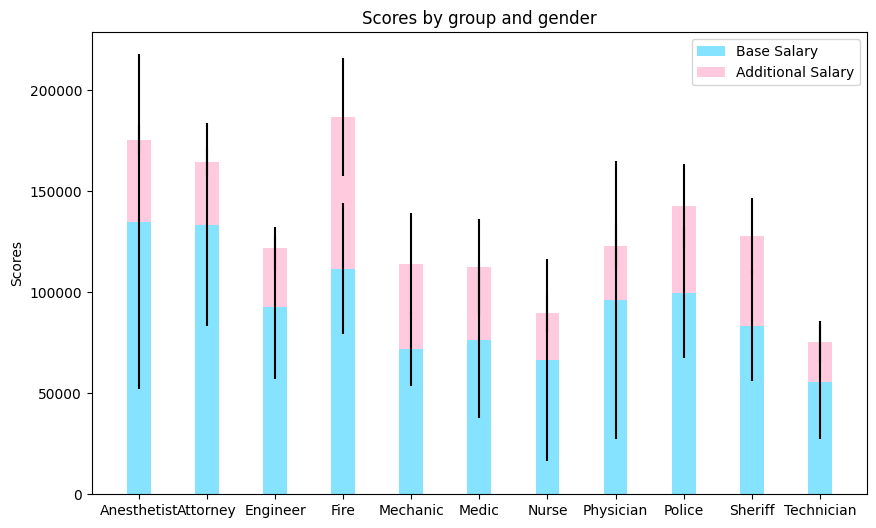

In [107]:
width = 0.35       # the width of the bars: can also be len(x) sequence

fig, ax = plt.subplots()

ax.bar(job_labels_df['Job Title'], average_base_df.sort_values(by=['Job Title'])['Average Base Salary'].values, width=width, yerr=base_stdev_df['Standard Deviation of Base Salary'], label='Base Salary', color='#85E3FF')
ax.bar(job_labels_df['Job Title'], average_additional_df.sort_values(by=['Job Title'])['Average Additional Salary'].values, width=width, yerr=additional_stdev_df['Standard Deviation of Additional Salary'].values, bottom=average_base_df.sort_values(by=['Job Title'])['Average Base Salary'], label='Additional Salary', color='#FFC9DE')

ax.set_ylabel('Scores')
ax.set_title('Scores by group and gender')
ax.legend()

plt.show()

##### Observations

- Overall, although Anesthetists and attorneys make the highest base salary,
as well as benefits, empoyees in the fire department received the highest overall pay 
due to their high overtime and other pays

----------------------------------------